## Package Installation and Loading

Checks and installs the required R packages, including both CRAN and Bioconductor packages, ensuring that all dependencies for the analysis are available. It installs Bioconductor packages using BiocManager and CRAN packages using install.packages(), then loads them into the R environment for further use.

In [1]:
# Install and load BiocManager if not already installed
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}
library(BiocManager)

# Define a vector of package names
packages <- c(
  "limma", 
  "qvalue", 
  "edgeR", 
  "cluster", 
  "gplots", 
  "RColorBrewer", 
  "survival", 
  "genefilter", 
  "ggplot2", 
  "ggpubr", 
  "ggfortify", 
  "org.Hs.eg.db", 
  "GO.db", 
  "biomaRt"
)

# Check and install packages if necessary
for (pkg in packages) {
  if (!requireNamespace(pkg, quietly = TRUE)) {
    # Install Bioconductor packages
    if (pkg %in% c("limma", "qvalue", "edgeR", "genefilter", "org.Hs.eg.db", "GO.db", "biomaRt")) {
      BiocManager::install(pkg)  # Install Bioconductor packages
    } else {
      install.packages(pkg, quiet = TRUE)  # Install non-Bioconductor packages
    }
  }
  # Load the packages
  library(pkg, character.only = TRUE)
}



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:limma’:

    plotMA


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, saveRDS, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes

## Import data

In [3]:
BC.expression <- readRDS("BC_expression_data.rds")
BC.clinical <- readRDS("BC_clinical_data.rds")


# Extract gene names

annot <- BC.expression$affy_hg_u133_plus_2

View(BC.expression)


affy_hg_u133_plus_2,hgnc_symbol,ensembl_gene_id,100B08,101B88,102B06,103B41,104B91,105B13,106B55,⋯,85A03,86A40,87A79,88A67,8B87,90A63,94A16,96A21,99A50,9B52
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1007_s_at,DDR1,ENSG00000137332,9.18294190966291,9.43668141070338,9.42338990342759,8.78583812871142,9.15115638002799,9.44017531437221,9.12053323333785,⋯,9.90155288200376,9.00580842262014,8.84685969987503,9.2978370637027,9.10163472656906,9.27590899881816,8.962576425739,9.19654381132633,9.13876446209615,9.23371628978215
1007_s_at,DDR1,ENSG00000230456,9.18294190966291,9.43668141070338,9.42338990342759,8.78583812871142,9.15115638002799,9.44017531437221,9.12053323333785,⋯,9.90155288200376,9.00580842262014,8.84685969987503,9.2978370637027,9.10163472656906,9.27590899881816,8.962576425739,9.19654381132633,9.13876446209615,9.23371628978215
1007_s_at,DDR1,ENSG00000204580,9.18294190966291,9.43668141070338,9.42338990342759,8.78583812871142,9.15115638002799,9.44017531437221,9.12053323333785,⋯,9.90155288200376,9.00580842262014,8.84685969987503,9.2978370637027,9.10163472656906,9.27590899881816,8.962576425739,9.19654381132633,9.13876446209615,9.23371628978215
1007_s_at,DDR1,ENSG00000215522,9.18294190966291,9.43668141070338,9.42338990342759,8.78583812871142,9.15115638002799,9.44017531437221,9.12053323333785,⋯,9.90155288200376,9.00580842262014,8.84685969987503,9.2978370637027,9.10163472656906,9.27590899881816,8.962576425739,9.19654381132633,9.13876446209615,9.23371628978215
1007_s_at,DDR1,ENSG00000234078,9.18294190966291,9.43668141070338,9.42338990342759,8.78583812871142,9.15115638002799,9.44017531437221,9.12053323333785,⋯,9.90155288200376,9.00580842262014,8.84685969987503,9.2978370637027,9.10163472656906,9.27590899881816,8.962576425739,9.19654381132633,9.13876446209615,9.23371628978215
1053_at,RFC2,ENSG00000049541,5.99544821233425,6.52483700187754,6.7336958002506,6.33470790377202,6.43094376281724,6.04089516145437,6.12593635587517,⋯,6.2786122503912,6.80397231339777,5.58600176936206,6.51862262585518,5.81345529006403,6.25119028182545,5.8540687981981,6.15940849208131,6.45558054284405,6.12080772650175
117_at,HSPA7,ENSG00000225217,6.16777757449975,6.80074686574082,5.9272650291955,6.2463473282025,6.37134962752514,5.98740193370225,6.45631101262826,⋯,6.22563643441344,6.0095676313842,6.32544612433035,6.16845724841713,6.62145164359807,5.74811614232585,5.57132416661024,6.42640166387244,5.8153378610854,5.83371628663462
117_at,HSPA6,ENSG00000173110,6.16777757449975,6.80074686574082,5.9272650291955,6.2463473282025,6.37134962752514,5.98740193370225,6.45631101262826,⋯,6.22563643441344,6.0095676313842,6.32544612433035,6.16845724841713,6.62145164359807,5.74811614232585,5.57132416661024,6.42640166387244,5.8153378610854,5.83371628663462
121_at,PAX8,ENSG00000125618,8.18398348094212,8.12356034728127,7.79380864884363,7.95118942749152,8.13442373128594,7.89883246470849,8.01985974773542,⋯,8.38078401505873,7.72863972208842,8.03439283106311,8.20662837421619,8.00876745526643,8.02894733844625,8.13224157725606,8.02724859401458,8.11735808869068,8.07202105220708


sampleID,histgrade,ERstatus,PRstatus,age,tumor_size_mm,LNstatus,Surv_time,event
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<dbl>,<lgl>
101B88,G3,ER-,PgR-,40,12,LN-,11.833,FALSE
102B06,G3,ER+,PgR+,51,26,LN-,11.833,FALSE
104B91,G3,ER+,PgR+,80,24,LN?,3.583,FALSE
110B34,G2,ER+,PgR+,74,20,LN-,11.667,FALSE
111B51,G3,ER+,PgR+,41,33,LN-,7.167,TRUE
127B00,G3,ER+,PgR+,57,22,LN-,4.667,TRUE
137B88,G2,ER-,PgR-,68,6,LN-,11.500,FALSE
143B81,G3,ER-,PgR-,93,29,LN?,2.167,FALSE
144B49,G2,ER+,PgR+,40,21,LN-,11.500,FALSE


In [4]:
View(BC.clinical)

sampleID,histgrade,ERstatus,PRstatus,age,tumor_size_mm,LNstatus,Surv_time,event
<chr>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<dbl>,<lgl>
101B88,G3,ER-,PgR-,40,12,LN-,11.833,FALSE
102B06,G3,ER+,PgR+,51,26,LN-,11.833,FALSE
104B91,G3,ER+,PgR+,80,24,LN?,3.583,FALSE
110B34,G2,ER+,PgR+,74,20,LN-,11.667,FALSE
111B51,G3,ER+,PgR+,41,33,LN-,7.167,TRUE
127B00,G3,ER+,PgR+,57,22,LN-,4.667,TRUE
137B88,G2,ER-,PgR-,68,6,LN-,11.500,FALSE
143B81,G3,ER-,PgR-,93,29,LN?,2.167,FALSE
144B49,G2,ER+,PgR+,40,21,LN-,11.500,FALSE


## create expression count matrix



In [5]:
Counts <- ( BC.expression[, 4:254] )

Counts <- data.frame(lapply(Counts,as.numeric))

Counts <- data.matrix(Counts)

rownames(Counts) <- annot

## Between array normalization

In [6]:
E <- normalizeBetweenArrays(Counts, method = "scale")

# 1. Clustering process:

## Scaling the expression data for cluster analysis

In [8]:
# Scale expression data
scaled.E <- t(scale(t(E), center = TRUE))

# Perform hierarchical clustering using Ward's method.
d <- dist(t(scaled.E))
hc <- hclust(d, method = "ward.D")

## Determining the Optimal Number of Clusters : silhouette method

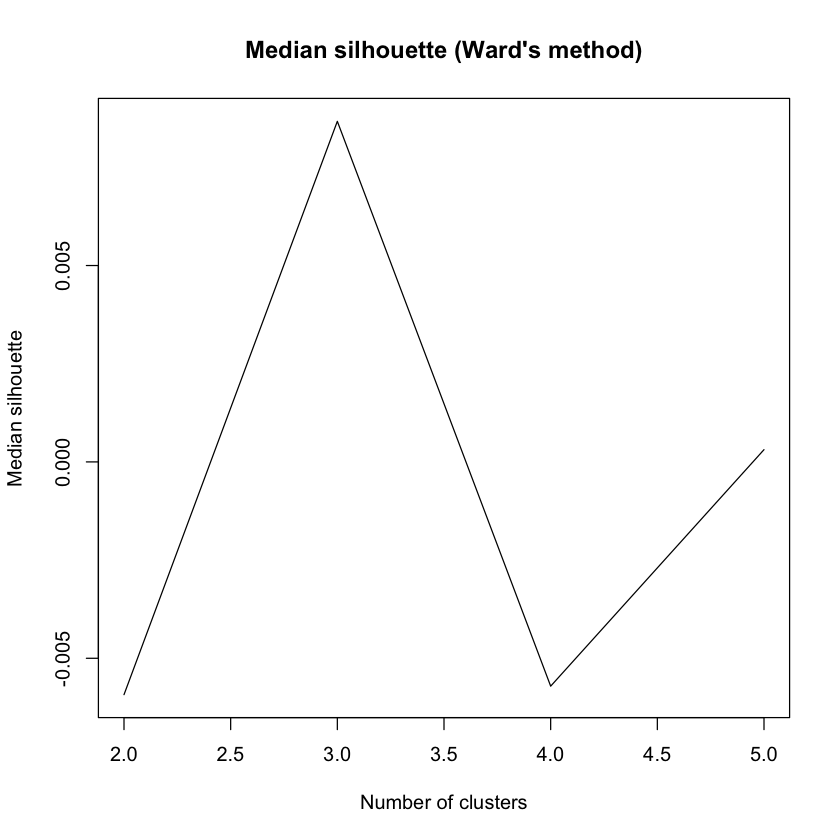

In [9]:
K <- 2:5
sh <- NULL
for (i in K) {
  sh <- c(sh, median(silhouette(cutree(hc, k = i), dist = d)[, 3], na.rm = T))
}

# Plot silhouette
plot(K, sh, type = "l", main = "Median silhouette (Ward's method)", xlab = "Number of clusters", ylab = "Median silhouette") 


# Obtain optimal clusters
cl <- cutree(hc, k = K[which.max(sh)])

In [10]:
# counts of each cluster
sum(cl==1)
sum(cl==2)
sum(cl==3)

[1] 65

[1] 59

[1] 127

## Principal Component Analysis

In [11]:
rv <- rowVars(scaled.E)

pc <- princomp(scaled.E[order(-rv)[1:4500], ])

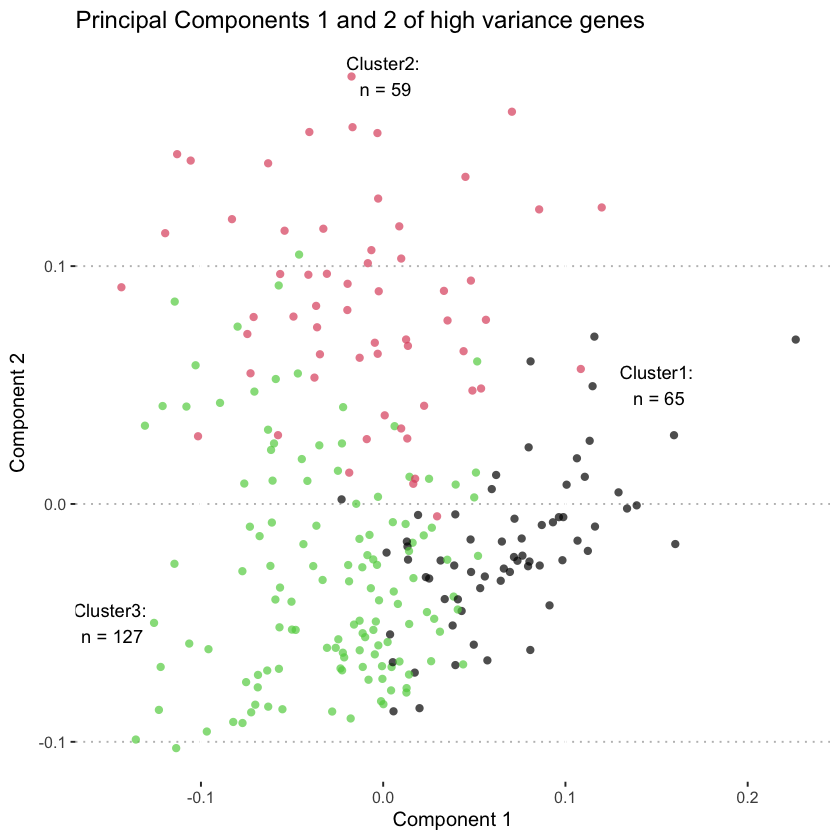

In [12]:
p <- ggplot(pc$loadings[, 1:2], aes(x = Comp.1, y = Comp.2))+
  geom_point( color = cl, size = 2, shape = 16, alpha = 0.7)+
  labs(x = "Component 1",
       y = "Component 2",
       title = "Principal Components 1 and 2 of high variance genes")+
  theme_pubclean()


 
p +  annotate("text", x = c(0.15, 0, -0.15 ), y = c(0.05, 0.18, -0.05), label = c("Cluster1:\n n = 65", "Cluster2:\n n = 59", "Cluster3:\n n = 127"))
  

## Create a heatmap

Warning message in cbind(...):
“number of rows of result is not a multiple of vector length (arg 2)”


,cols
X100B08,aquamarine1
X101B88,grey72
X102B06,yellowgreen
X103B41,aquamarine1
X104B91,grey72
X105B13,yellowgreen


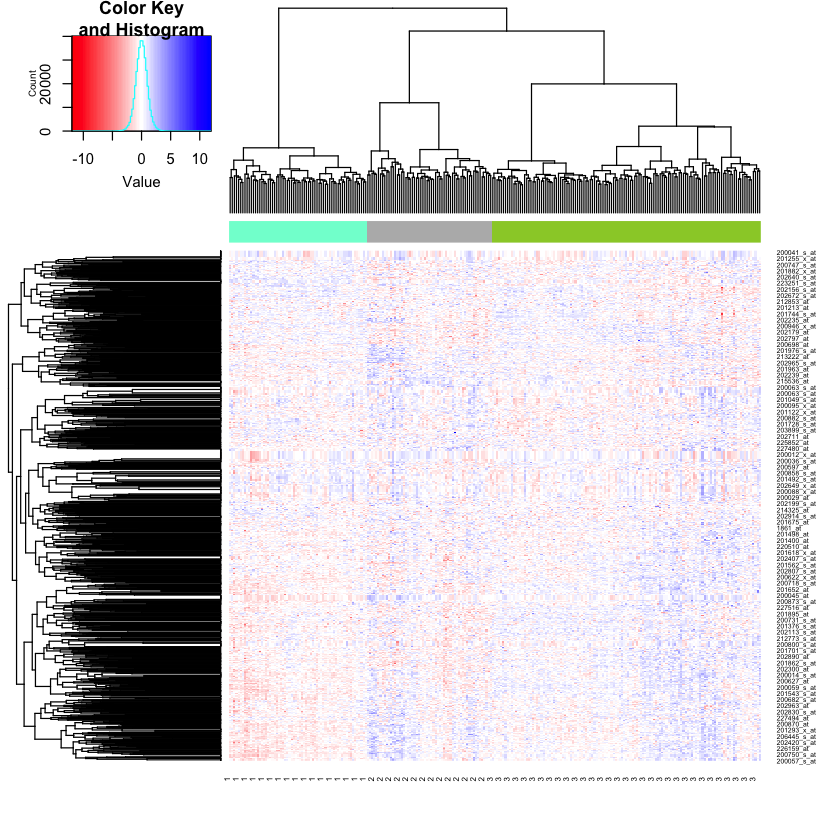

In [13]:
rv <- rowVars(scaled.E)
# Select high variance genes
idx <- order(-rv)[1:1500]
# Specify colour palette
cols <- colors()[seq(9, length(colors()), len = length(unique(cl)))]
# Inspect colours mapped to columns of E
head(cbind(colnames(E), cols))
# Produce heatmap
heatmap.2(scaled.E[idx, ],  Colv = as.dendrogram(hc), margins = c(5, 5), labCol = cl,  trace = "none", ColSideColors = cols[cl], col = redblue(100))

# 2. Gene Expression Analysis

In [14]:
# Specify design matrix
design <- model.matrix(~as.factor(cl)) 
# Construct DE object
DE.object <- lmFit(E, design)
# Perform Empirical Bayes
DE.object <- eBayes(DE.object)

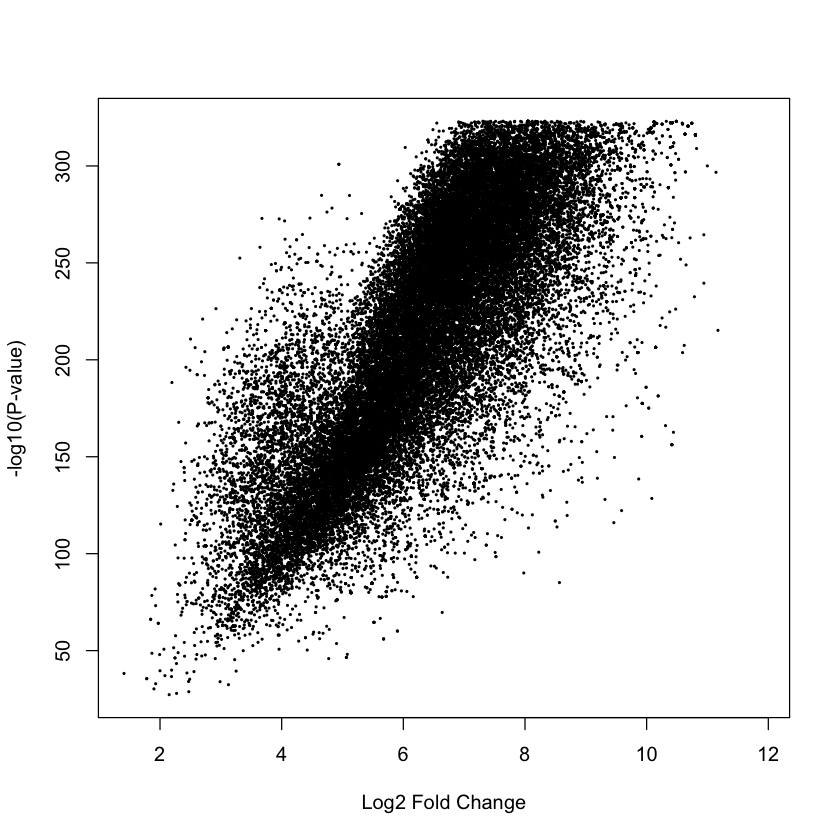

In [15]:
#Volcano plot

volcanoplot(DE.object)

## DE genes between cluster 1 and 2

In [16]:
pval2 <- DE.object$p.value[,2]

# Obtain DE genes with qvalue<=0.05
qval2 <- qvalue(pval2, fdr.level = 0.05)

sprintf("There are %i genes with p-values <= 0.05.", sum(pval2 <= 0.05))

sprintf("There are %i genes with q-values <= 0.05.", sum(qval2$qvalue <= 0.05))

[1] "There are 22435 genes with p-values <= 0.05."

[1] "There are 23714 genes with q-values <= 0.05."

## DE genes between cluster 1 and 3

In [17]:
pval3 <- DE.object$p.value[,3]

# Obtain DE genes with qvalue<=0.05
qval3 <- qvalue(pval3, fdr.level = 0.05)

sprintf("There are %i genes with p-values <= 0.05.", sum(pval3 <= 0.05))

sprintf("There are %i genes with q-values <= 0.05.", sum(qval3$qvalue <= 0.05))

[1] "There are 22269 genes with p-values <= 0.05."

[1] "There are 24084 genes with q-values <= 0.05."

# 3. Enrichment analysis


In [18]:
#Extracting top 100 list of statistically significant DE genes

DE.top <- topTable(DE.object, number = 100, adjust = "none")
DE.top.names <-DE.top$ID

Removing intercept from test coefficients



In [19]:
#Importing reference gene names from biomaRt

mart <- useMart("ENSEMBL_MART_ENSEMBL")
mart <- useDataset("hsapiens_gene_ensembl", mart)

In [20]:
#creating  a 'lookup' tables of annotation with Top 100 genes that can be used to rename Affy IDs to gene names.
#Differential expressed genes between all clusters
annotLookup <- getBM(
  mart = mart,
  attributes = c(
    "affy_hg_u133_plus_2",
    "ensembl_gene_id",
    "gene_biotype",
    "external_gene_name"),
  filter = "affy_hg_u133_plus_2",
  values = DE.top.names,
  uniqueRows=TRUE)


# writing gene names to text file
write(annotLookup$external_gene_name, "DEgenes.txt")

View(annotLookup)

affy_hg_u133_plus_2,ensembl_gene_id,gene_biotype,external_gene_name
<chr>,<chr>,<chr>,<chr>
229437_at,ENSG00000283904,miRNA,MIR155
209149_s_at,ENSG00000285465,protein_coding,TM9SF1
209149_s_at,ENSG00000285502,protein_coding,
210052_s_at,ENSG00000088325,protein_coding,TPX2
208682_s_at,ENSG00000102316,protein_coding,MAGED2
204162_at,ENSG00000080986,protein_coding,NDC80
208682_s_at,ENSG00000221716,snoRNA,SNORA11
213911_s_at,ENSG00000164032,protein_coding,H2AZ1
200853_at,ENSG00000164032,protein_coding,H2AZ1


## Enrichment Analysis: top GO terms approach

In [21]:
DE_genes_all <-  annotLookup$external_gene_name

# Test for GO terms in selected set of genes, for specific reference genome
GO_terms_present_all <- goana(DE_genes_all, species='Hs')
GO_top_terms_all <- topGO(GO_terms_present_all, n=100)

# View top results of Biological Processes
GO_top_terms_all[GO_top_terms_all$Ont=='BP',][1:15,]


,Term,Ont,N,DE,P.DE
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GO:0071266,'de novo' L-methionine biosynthetic process,BP,1,0,1
GO:0070060,'de novo' actin filament nucleation,BP,1,0,1
GO:1901737,(R)-mevalonic acid biosynthetic process,BP,1,0,1
GO:1901735,(R)-mevalonic acid metabolic process,BP,1,0,1
GO:1903100,"1-phosphatidyl-1D-myo-inositol 3,5-bisphosphate metabolic process",BP,1,0,1
GO:0046360,2-oxobutyrate biosynthetic process,BP,1,0,1
GO:0019606,2-oxobutyrate catabolic process,BP,1,0,1
GO:0006666,3-keto-sphinganine metabolic process,BP,1,0,1
GO:0018960,4-nitrophenol metabolic process,BP,1,0,1


In [22]:
homo_sapiens <- org.Hs.eg.db # Obtain homo sapiens details for GO test
# Create character list of genes using our original annotation data
my_symbols <- as.character(BC.expression[,2])
# Link gene details to entrez ids
conversion_tab <- select(homo_sapiens,
                          keys = my_symbols,
                          columns = c("ENTREZID", "SYMBOL"),
                          keytype = "SYMBOL")

'select()' returned many:many mapping between keys and columns



## Differentialy expressed genes between cluster 1 and 2

In [23]:
# Only select those entrez ids that are for genes that pass the fdr threshold
DE_genes2 <- conversion_tab$ENTREZID[conversion_tab$SYMBOL] %in% my_symbols[qval2$significant]

# Test for GO terms in selected set of genes, for specific reference genome
GO_terms_present2 <- goana(DE_genes2, species='Hs')
GO_top_terms2 <- topGO(GO_terms_present2, n=100)

# View top results of Biological Processes
GO_top_terms2[GO_top_terms2$Ont=='BP',][1:15,]

,Term,Ont,N,DE,P.DE
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GO:0071266,'de novo' L-methionine biosynthetic process,BP,1,0,1
GO:0070060,'de novo' actin filament nucleation,BP,1,0,1
GO:1901737,(R)-mevalonic acid biosynthetic process,BP,1,0,1
GO:1901735,(R)-mevalonic acid metabolic process,BP,1,0,1
GO:1903100,"1-phosphatidyl-1D-myo-inositol 3,5-bisphosphate metabolic process",BP,1,0,1
GO:0046360,2-oxobutyrate biosynthetic process,BP,1,0,1
GO:0019606,2-oxobutyrate catabolic process,BP,1,0,1
GO:0006666,3-keto-sphinganine metabolic process,BP,1,0,1
GO:0018960,4-nitrophenol metabolic process,BP,1,0,1


## Differentially expressed genes between cluster 1 and 3

In [24]:
# Only select those entrez ids that are for genes that pass the fdr threshold
DE_genes3 <- conversion_tab$ENTREZID[conversion_tab$SYMBOL] %in% my_symbols[qval3$significant]

# Test for GO terms in selected set of genes, for specific reference genome
GO_terms_present3 <- goana(DE_genes3 , species='Hs')
GO_top_terms3 <- topGO(GO_terms_present3 , n=100)

# View top results of Biological Processes
GO_top_terms3[GO_top_terms3$Ont=='BP',][1:15,]

,Term,Ont,N,DE,P.DE
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GO:0071266,'de novo' L-methionine biosynthetic process,BP,1,0,1
GO:0070060,'de novo' actin filament nucleation,BP,1,0,1
GO:1901737,(R)-mevalonic acid biosynthetic process,BP,1,0,1
GO:1901735,(R)-mevalonic acid metabolic process,BP,1,0,1
GO:1903100,"1-phosphatidyl-1D-myo-inositol 3,5-bisphosphate metabolic process",BP,1,0,1
GO:0046360,2-oxobutyrate biosynthetic process,BP,1,0,1
GO:0019606,2-oxobutyrate catabolic process,BP,1,0,1
GO:0006666,3-keto-sphinganine metabolic process,BP,1,0,1
GO:0018960,4-nitrophenol metabolic process,BP,1,0,1


# 4. Survival analysis

## Calculating and scaling gene scores

In [25]:
# Form gene expression based on expression of significant DE genes between cluster 1 and 2
gene.score2 <- colSums(E[qval2$sig, ])
# standardize gene score (to have mean=0, SD=1)
gene.score2 <- scale(gene.score2)


#Creating survival object for Kaplan-Meier Survival Curves


Y <- Surv(BC.clinical$Surv_time, BC.clinical$event == T)


### Hazard ratio : between different clusters

Call:
coxph(formula = Surv(Surv_time, event) ~ gene.score2 + as.factor(cl), 
    data = BC.clinical)

  n= 236, number of events= 55 
   (15 observations deleted due to missingness)

                  coef exp(coef) se(coef)      z Pr(>|z|)  
gene.score2     0.3566    1.4284   0.1573  2.267   0.0234 *
as.factor(cl)2 -0.9295    0.3947   0.4216 -2.205   0.0275 *
as.factor(cl)3 -0.6593    0.5172   0.3398 -1.940   0.0524 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
gene.score2       1.4284     0.7001    1.0495     1.944
as.factor(cl)2    0.3947     2.5333    0.1727     0.902
as.factor(cl)3    0.5172     1.9334    0.2657     1.007

Concordance= 0.6  (se = 0.038 )
Likelihood ratio test= 7.8  on 3 df,   p=0.05
Wald test            = 7.44  on 3 df,   p=0.06
Score (logrank) test = 7.54  on 3 df,   p=0.06


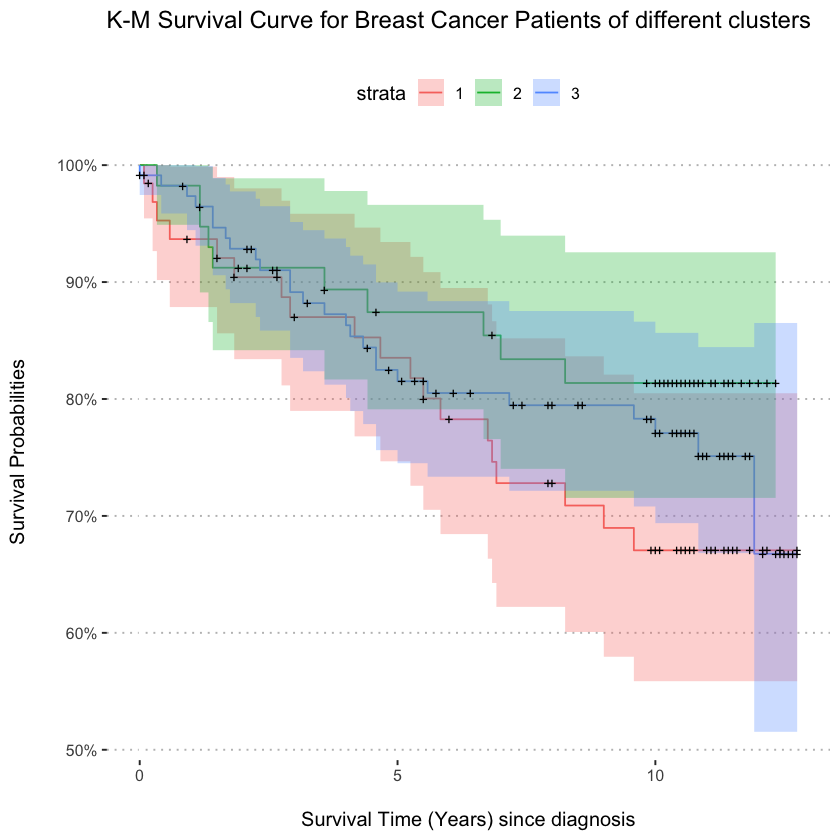

In [26]:
# Perform Cox regression to estimate HR of gene.score between cluster 1 and 2
cox.model2 <- coxph(Surv(Surv_time, event) ~ gene.score2 + as.factor(cl), data = BC.clinical)

summary(cox.model2)




#Kaplan-Meier Survival Curve 
kmfit <- survfit(Y ~  cl)

p1 <- autoplot(kmfit) +
  labs(x = "\n Survival Time (Years) since diagnosis ", 
       y = "Survival Probabilities \n", 
       title = "K-M Survival Curve for Breast Cancer Patients of different clusters \n")+
  theme_pubclean()

p1




### Hazard ratio : LNstatus

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; coefficient may be infinite. ”


Call:
coxph(formula = Surv(Surv_time, event) ~ gene.score2 + as.factor(LNstatus), 
    data = BC.clinical)

  n= 236, number of events= 55 
   (15 observations deleted due to missingness)

                             coef  exp(coef)   se(coef)      z Pr(>|z|)    
gene.score2             2.090e-01  1.232e+00  1.389e-01  1.505    0.132    
as.factor(LNstatus)LN? -1.599e+01  1.141e-07  3.462e+03 -0.005    0.996    
as.factor(LNstatus)LN+  1.384e+00  3.991e+00  2.771e-01  4.996 5.87e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                       exp(coef) exp(-coef) lower .95 upper .95
gene.score2            1.232e+00  8.114e-01    0.9388     1.618
as.factor(LNstatus)LN? 1.141e-07  8.767e+06    0.0000       Inf
as.factor(LNstatus)LN+ 3.991e+00  2.505e-01    2.3189     6.870

Concordance= 0.718  (se = 0.032 )
Likelihood ratio test= 30.24  on 3 df,   p=1e-06
Wald test            = 27.89  on 3 df,   p=4e-06
Score (logrank) test = 33.78  on 3 df,   p=2e-07


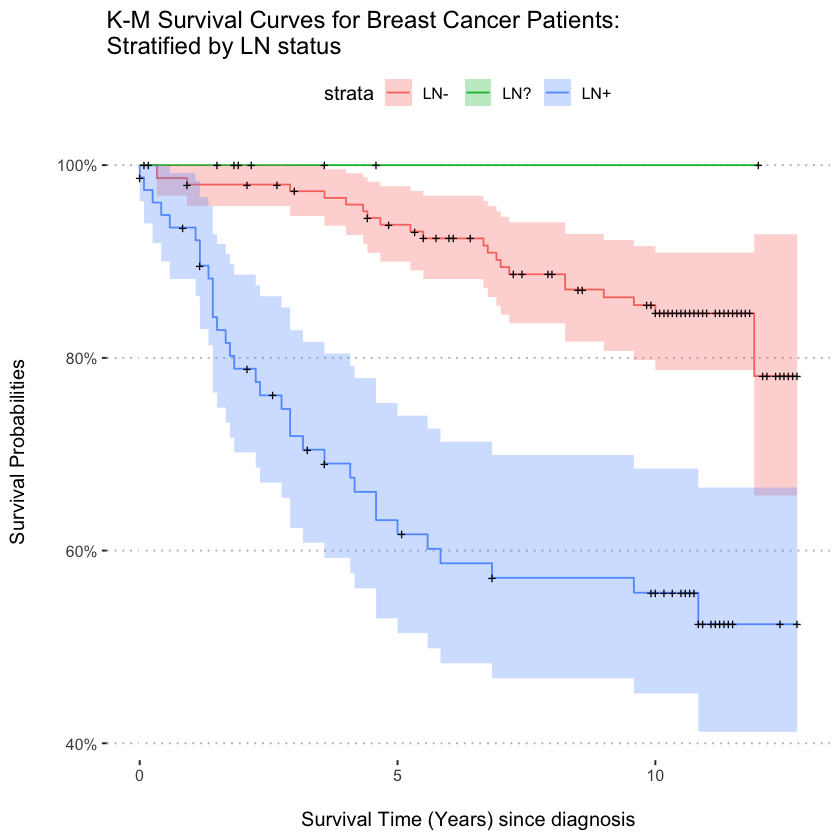

In [27]:
# Perform Cox regression to estimate HR of gene.score
cox.model2_LNstatus <- coxph(Surv(Surv_time, event) ~ gene.score2 + as.factor(LNstatus), data = BC.clinical)

summary(cox.model2_LNstatus)

kmfit <- survfit(Y ~  BC.clinical$LNstatus  )

#Kaplan-Meier Survival Curve 
autoplot(kmfit) +
  labs(x = "\n Survival Time (Years) since diagnosis ", 
       y = "Survival Probabilities \n", 
       title = "K-M Survival Curves for Breast Cancer Patients: \nStratified by LN status")+
  theme_pubclean()

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; coefficient may be infinite. ”


Call:
coxph(formula = Surv(Surv_time, event) ~ gene.score2 + as.factor(LNstatus) + 
    as.factor(cl), data = BC.clinical)

  n= 236, number of events= 55 
   (15 observations deleted due to missingness)

                             coef  exp(coef)   se(coef)      z Pr(>|z|)    
gene.score2             3.297e-01  1.391e+00  1.552e-01  2.124   0.0337 *  
as.factor(LNstatus)LN? -1.596e+01  1.169e-07  3.506e+03 -0.005   0.9964    
as.factor(LNstatus)LN+  1.346e+00  3.841e+00  2.781e-01  4.839 1.31e-06 ***
as.factor(cl)2         -7.672e-01  4.643e-01  4.146e-01 -1.850   0.0643 .  
as.factor(cl)3         -5.411e-01  5.821e-01  3.365e-01 -1.608   0.1078    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                       exp(coef) exp(-coef) lower .95 upper .95
gene.score2            1.391e+00  7.191e-01     1.026     1.885
as.factor(LNstatus)LN? 1.169e-07  8.551e+06     0.000       Inf
as.factor(LNstatus)LN+ 3.841e+00  2.603e-01     2.227     6.626
as.factor(cl)2 

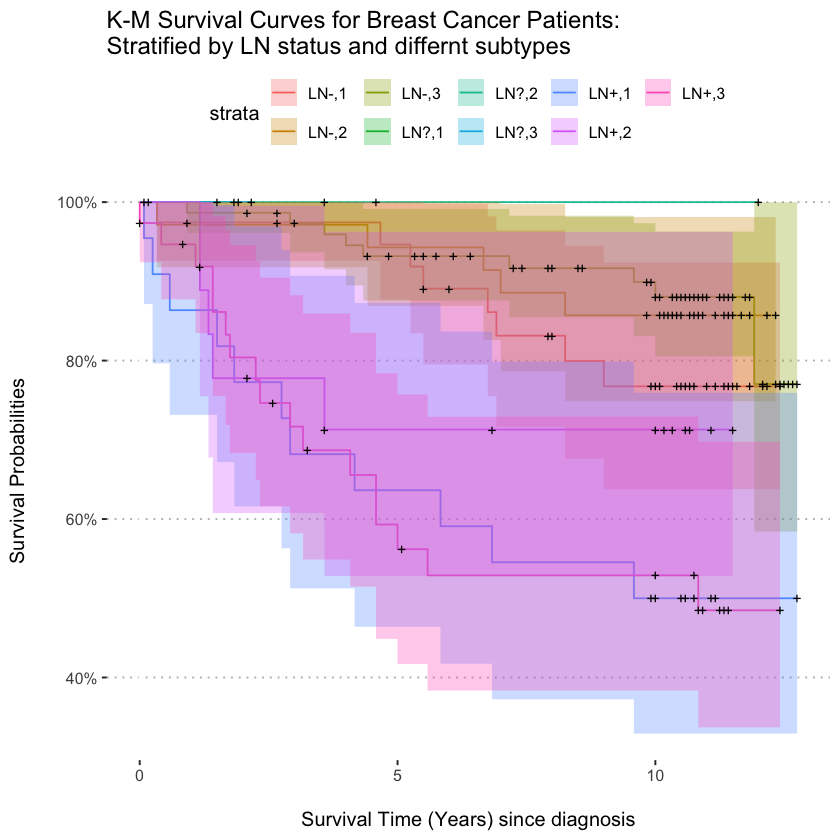

In [28]:
# Perform Cox regression to estimate HR of gene.score
cox.model2_LNstatus_cl <- coxph(Surv(Surv_time, event) ~ gene.score2 + as.factor(LNstatus)  + as.factor(cl), data = BC.clinical)

summary(cox.model2_LNstatus_cl)



kmfit <- survfit(Y ~  BC.clinical$LNstatus + as.factor(cl) )
#Kaplan-Meier Survival Curve 
autoplot(kmfit) +
  labs(x = "\n Survival Time (Years) since diagnosis ", 
       y = "Survival Probabilities \n", 
       title = "K-M Survival Curves for Breast Cancer Patients: \nStratified by LN status and differnt subtypes")+
  theme_pubclean()


## Exploratory analysis of numerical clinical features to identify median of distribution

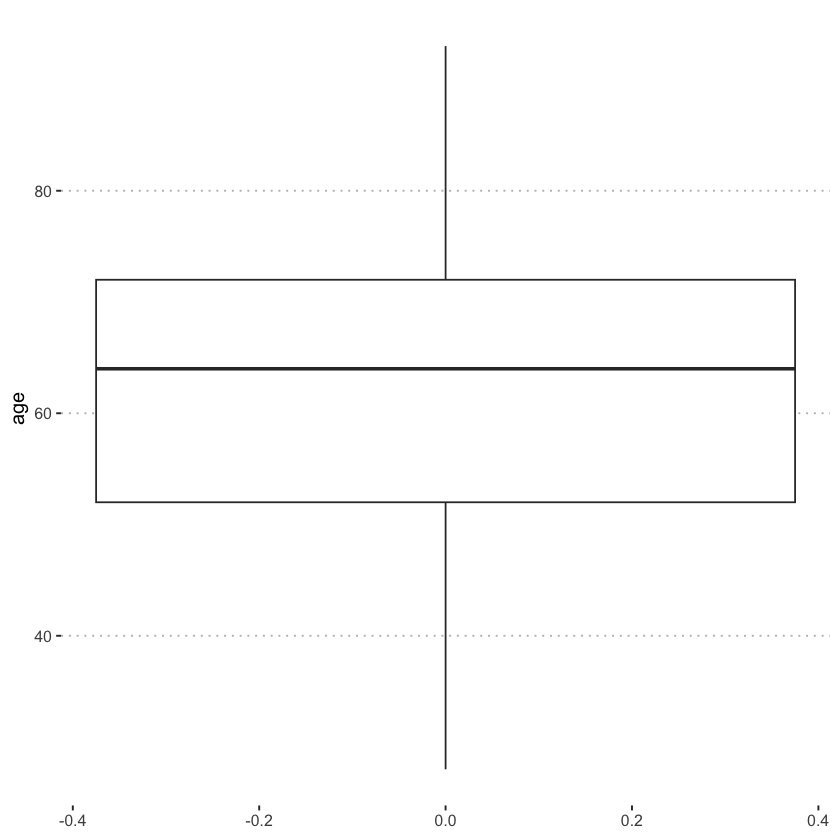

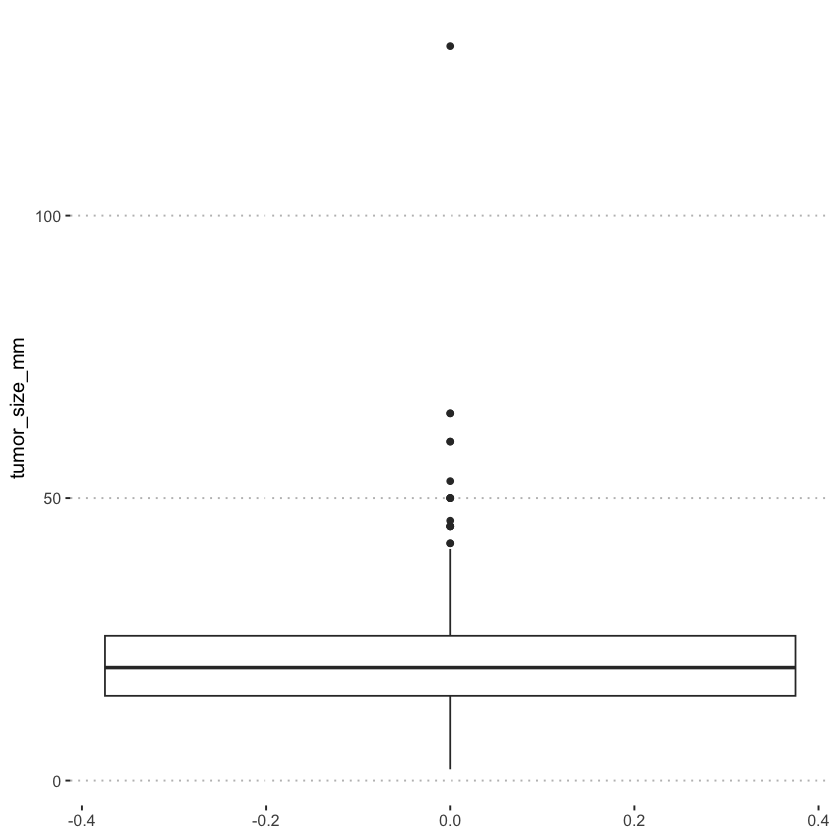

In [29]:
ggplot(BC.clinical) +
  geom_boxplot(aes(age))+
  coord_flip()+
  theme_pubclean()

ggplot(BC.clinical) +
  geom_boxplot(aes( tumor_size_mm) )+
  coord_flip()+
  theme_pubclean()


### Hazard ratio : Tumor size greater than 20 mm

Call:
coxph(formula = Surv(Surv_time, event) ~ gene.score2 + as.factor(tumor_size_mm > 
    20), data = BC.clinical)

  n= 236, number of events= 55 
   (15 observations deleted due to missingness)

                                    coef exp(coef) se(coef)     z Pr(>|z|)    
gene.score2                       0.2221    1.2487   0.1363 1.630    0.103    
as.factor(tumor_size_mm > 20)TRUE 1.5759    4.8351   0.3271 4.818 1.45e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                  exp(coef) exp(-coef) lower .95 upper .95
gene.score2                           1.249     0.8008     0.956     1.631
as.factor(tumor_size_mm > 20)TRUE     4.835     0.2068     2.547     9.180

Concordance= 0.719  (se = 0.034 )
Likelihood ratio test= 31.13  on 2 df,   p=2e-07
Wald test            = 25.57  on 2 df,   p=3e-06
Score (logrank) test = 30.53  on 2 df,   p=2e-07


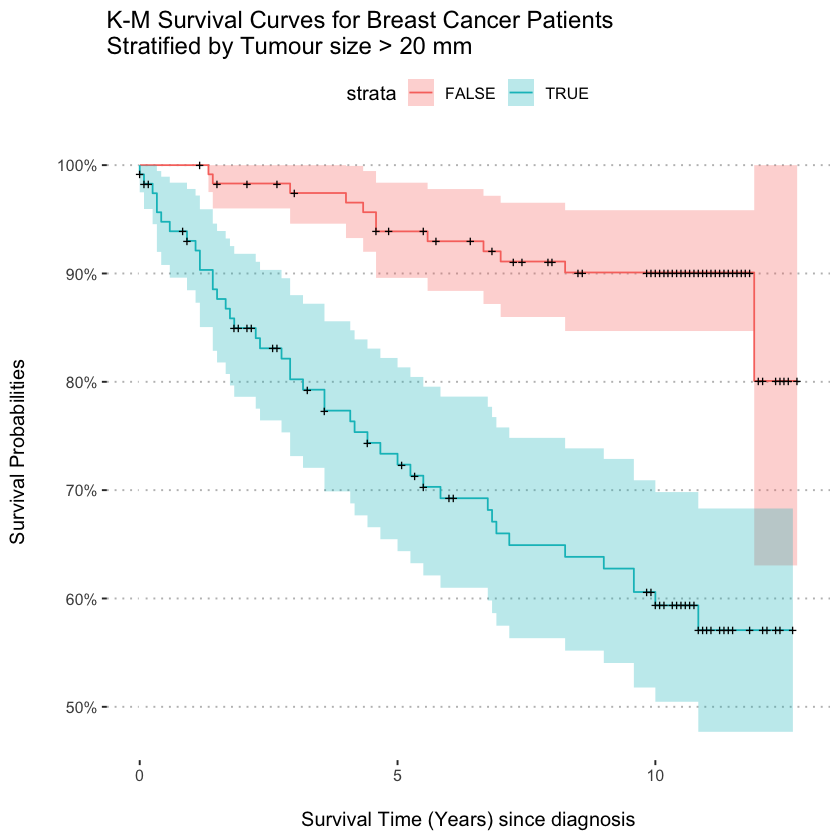

In [30]:
# Perform Cox regression to estimate HR of gene.score
cox.model2_tumour_size <- coxph(Surv(Surv_time, event) ~ gene.score2 + as.factor(tumor_size_mm > 20), data = BC.clinical)

summary(cox.model2_tumour_size)
  


#Kaplan-Meier Survival Curve 
kmfit <- survfit(Y ~  as.factor(BC.clinical$tumor_size_mm > 20) )

autoplot(kmfit) +
  labs(x = "\n Survival Time (Years) since diagnosis ", 
       y = "Survival Probabilities \n", 
       title = "K-M Survival Curves for Breast Cancer Patients \nStratified by Tumour size > 20 mm")+
  theme_pubclean()

Call:
coxph(formula = Surv(Surv_time, event) ~ gene.score2 + as.factor(tumor_size_mm > 
    20) + as.factor(cl), data = BC.clinical)

  n= 236, number of events= 55 
   (15 observations deleted due to missingness)

                                     coef exp(coef) se(coef)      z Pr(>|z|)
gene.score2                        0.3126    1.3670   0.1526  2.049   0.0405
as.factor(tumor_size_mm > 20)TRUE  1.5142    4.5459   0.3312  4.571 4.85e-06
as.factor(cl)2                    -0.5298    0.5887   0.4115 -1.287   0.1980
as.factor(cl)3                    -0.4640    0.6288   0.3395 -1.367   0.1716
                                     
gene.score2                       *  
as.factor(tumor_size_mm > 20)TRUE ***
as.factor(cl)2                       
as.factor(cl)3                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                  exp(coef) exp(-coef) lower .95 upper .95
gene.score2                          1.3670     0.7315    1.0136   

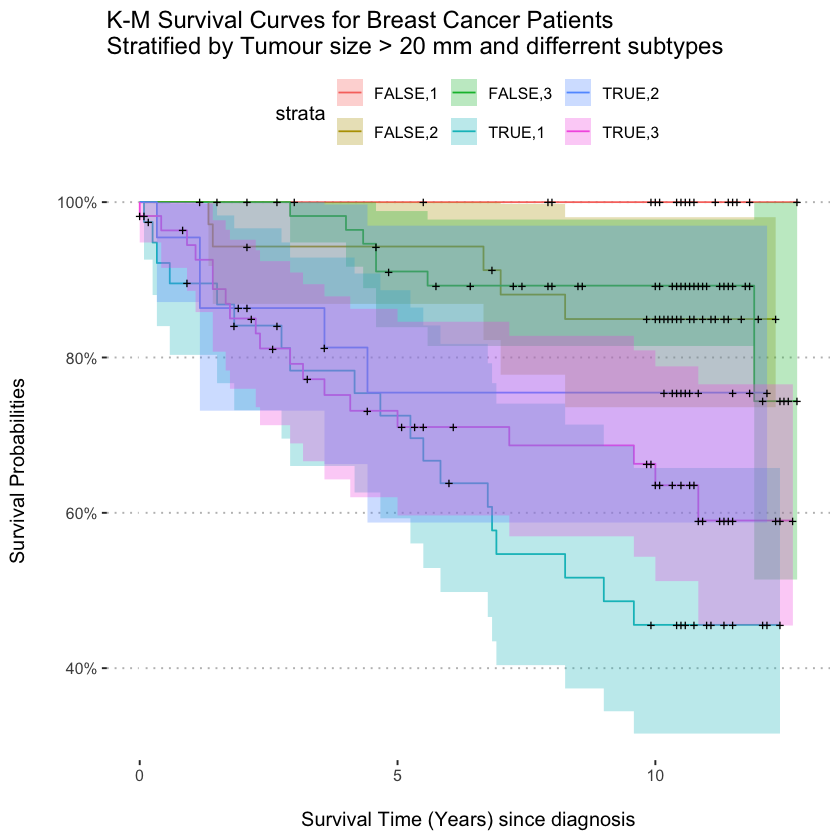

In [31]:
# Perform Cox regression to estimate HR of gene.score
cox.model2_tumour_size_cl <- coxph(Surv(Surv_time, event) ~ gene.score2 + as.factor(tumor_size_mm > 20)  + as.factor(cl), data = BC.clinical)

summary(cox.model2_tumour_size_cl)



kmfit <- survfit(Y ~  as.factor(BC.clinical$tumor_size_mm > 20) +cl )
#Kaplan-Meier Survival Curve 
autoplot(kmfit) +
  labs(x = "\n Survival Time (Years) since diagnosis ", 
       y = "Survival Probabilities \n", 
       title = "K-M Survival Curves for Breast Cancer Patients \nStratified by Tumour size > 20 mm and differrent subtypes")+
  theme_pubclean()


### Hazard ratio : Age

Call:
coxph(formula = Surv(Surv_time, event) ~ gene.score2 + as.factor(age > 
    60), data = BC.clinical)

  n= 236, number of events= 55 
   (15 observations deleted due to missingness)

                           coef exp(coef) se(coef)      z Pr(>|z|)
gene.score2              0.2014    1.2231   0.1377  1.462    0.144
as.factor(age > 60)TRUE -0.1031    0.9021   0.2711 -0.380    0.704

                        exp(coef) exp(-coef) lower .95 upper .95
gene.score2                1.2231     0.8176    0.9337     1.602
as.factor(age > 60)TRUE    0.9021     1.1086    0.5302     1.535

Concordance= 0.571  (se = 0.037 )
Likelihood ratio test= 2.37  on 2 df,   p=0.3
Wald test            = 2.36  on 2 df,   p=0.3
Score (logrank) test = 2.37  on 2 df,   p=0.3


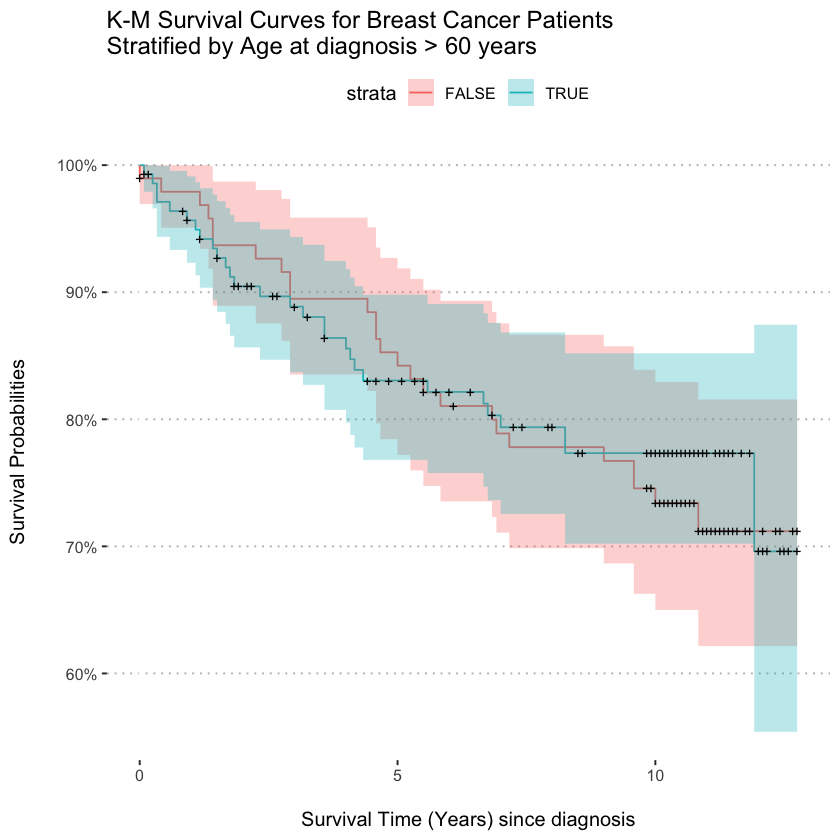

In [32]:
# Perform Cox regression to estimate HR of gene.score
cox.model2_age <- coxph(Surv(Surv_time, event) ~ gene.score2 + as.factor(age > 60), data = BC.clinical)

summary(cox.model2_age)



kmfit <- survfit(Y ~  as.factor(BC.clinical$age > 60) )
#Kaplan-Meier Survival Curve 
autoplot(kmfit) +
  labs(x = "\n Survival Time (Years) since diagnosis ", 
       y = "Survival Probabilities \n", 
       title = "K-M Survival Curves for Breast Cancer Patients \nStratified by Age at diagnosis > 60 years")+
  theme_pubclean()



### Hazard ratio : histgrade



Call:
coxph(formula = Surv(Surv_time, event) ~ gene.score2 + as.factor(histgrade), 
    data = BC.clinical)

  n= 236, number of events= 55 
   (15 observations deleted due to missingness)

                          coef exp(coef) se(coef)      z Pr(>|z|)  
gene.score2             0.1578    1.1709   0.1373  1.149   0.2504  
as.factor(histgrade)G1 -1.8658    0.1548   1.0730 -1.739   0.0821 .
as.factor(histgrade)G2 -0.9314    0.3940   1.0208 -0.912   0.3616  
as.factor(histgrade)G3 -0.4132    0.6615   1.0307 -0.401   0.6885  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                       exp(coef) exp(-coef) lower .95 upper .95
gene.score2               1.1709      0.854   0.89466     1.533
as.factor(histgrade)G1    0.1548      6.461   0.01890     1.268
as.factor(histgrade)G2    0.3940      2.538   0.05329     2.914
as.factor(histgrade)G3    0.6615      1.512   0.08775     4.987

Concordance= 0.661  (se = 0.034 )
Likelihood ratio test= 14.92  on 4 df,   p=0.00

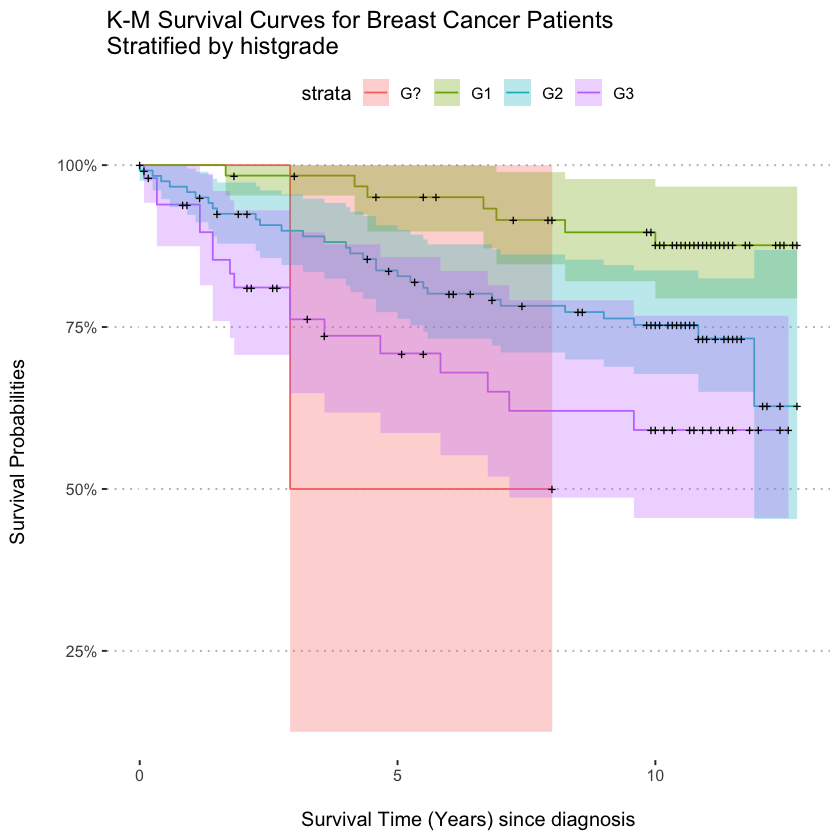

In [33]:
# Perform Cox regression to estimate HR of gene.score
cox.model2_histgrade <- coxph(Surv(Surv_time, event) ~ gene.score2 + as.factor(histgrade), data = BC.clinical)

summary(cox.model2_histgrade)


kmfit <- survfit(Y ~  BC.clinical$histgrade )
#Kaplan-Meier Survival Curve 
autoplot(kmfit) +
  labs(x = "\n Survival Time (Years) since diagnosis ", 
       y = "Survival Probabilities \n", 
       title = "K-M Survival Curves for Breast Cancer Patients \nStratified by histgrade")+
  theme_pubclean()

In [34]:
#Percentage of histgrade 

summary(as.factor(BC.clinical$histgrade))

G?  G1  G2  G3 
  2  67 128  54

### Hazard ratio : ER status

Warning message in coxph.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Loglik converged before variable  2 ; coefficient may be infinite. ”


Call:
coxph(formula = Surv(Surv_time, event) ~ gene.score2 + as.factor(ERstatus), 
    data = BC.clinical)

  n= 236, number of events= 55 
   (15 observations deleted due to missingness)

                             coef  exp(coef)   se(coef)      z Pr(>|z|)
gene.score2             2.099e-01  1.234e+00  1.386e-01  1.515    0.130
as.factor(ERstatus)ER? -1.602e+01  1.104e-07  2.950e+03 -0.005    0.996
as.factor(ERstatus)ER+  6.594e-02  1.068e+00  4.335e-01  0.152    0.879

                       exp(coef) exp(-coef) lower .95 upper .95
gene.score2            1.234e+00  8.107e-01    0.9402     1.618
as.factor(ERstatus)ER? 1.104e-07  9.057e+06    0.0000       Inf
as.factor(ERstatus)ER+ 1.068e+00  9.362e-01    0.4567     2.498

Concordance= 0.577  (se = 0.037 )
Likelihood ratio test= 4.44  on 3 df,   p=0.2
Wald test            = 2.35  on 3 df,   p=0.5
Score (logrank) test = 3.37  on 3 df,   p=0.3


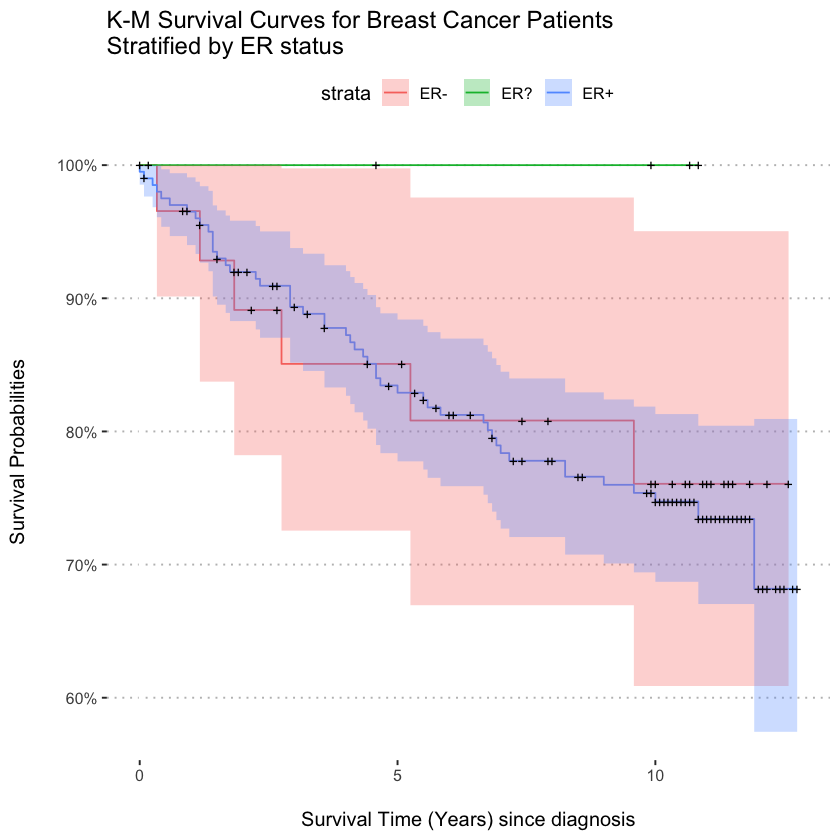

In [35]:
# Perform Cox regression to estimate HR of gene.score
cox.model2_ERstatus <- coxph(Surv(Surv_time, event) ~ gene.score2 + as.factor(ERstatus), data = BC.clinical)

summary(cox.model2_ERstatus)


kmfit <- survfit(Y ~  BC.clinical$ERstatus )
#Kaplan-Meier Survival Curve 
autoplot(kmfit) +
  labs(x = "\n Survival Time (Years) since diagnosis ", 
       y = "Survival Probabilities \n", 
       title = "K-M Survival Curves for Breast Cancer Patients \nStratified by ER status")+
  theme_pubclean()

### Percentage of ER+ patients


In [36]:
summary(as.factor(BC.clinical$ERstatus))

213/251*100


#Frequency table to identify proportions of ER+ patients between clusters.

BC.clinical$cluster <- cl

table_count<-table(BC.clinical$ERstatus, BC.clinical$cluster)

table_count
prop.table(table_count)

ER- ER? ER+ 
 34   4 213

[1] 84.86056

     
        1   2   3
  ER-  15   5  14
  ER?   0   3   1
  ER+  50  51 112

     
                1           2           3
  ER- 0.059760956 0.019920319 0.055776892
  ER? 0.000000000 0.011952191 0.003984064
  ER+ 0.199203187 0.203187251 0.446215139

### Hazard ratio : PR status

Call:
coxph(formula = Surv(Surv_time, event) ~ gene.score2 + as.factor(PRstatus), 
    data = BC.clinical)

  n= 236, number of events= 55 
   (15 observations deleted due to missingness)

                           coef exp(coef) se(coef)      z Pr(>|z|)
gene.score2              0.2103    1.2341   0.1379  1.525    0.127
as.factor(PRstatus)PgR+ -0.3812    0.6830   0.3035 -1.256    0.209

                        exp(coef) exp(-coef) lower .95 upper .95
gene.score2                 1.234     0.8103    0.9417     1.617
as.factor(PRstatus)PgR+     0.683     1.4640    0.3768     1.238

Concordance= 0.573  (se = 0.039 )
Likelihood ratio test= 3.71  on 2 df,   p=0.2
Wald test            = 3.77  on 2 df,   p=0.2
Score (logrank) test = 3.78  on 2 df,   p=0.2


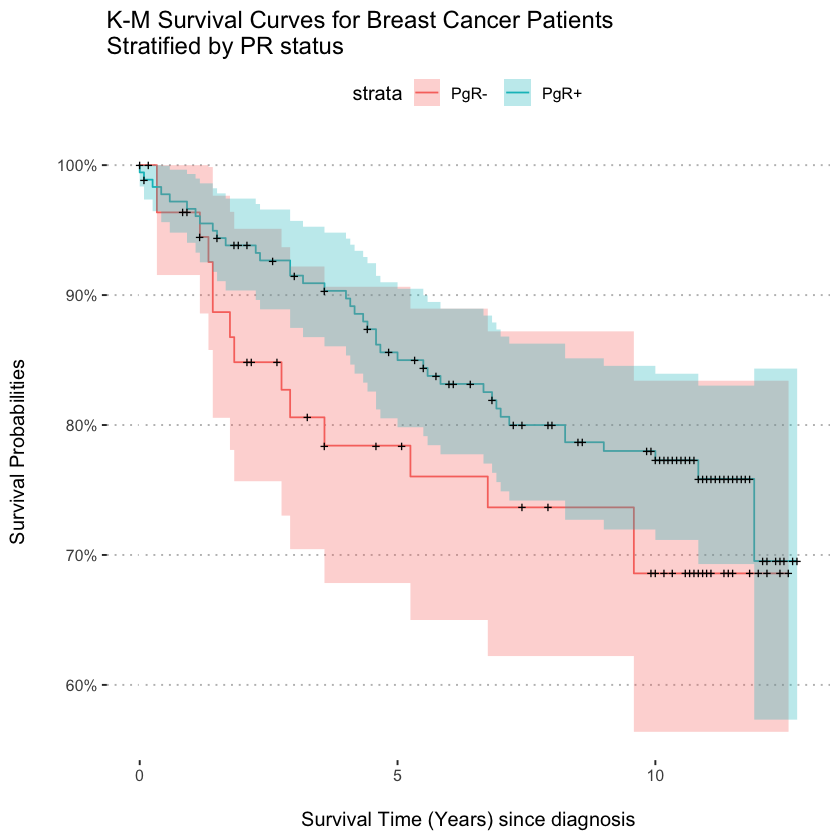

In [37]:
# Perform Cox regression to estimate HR of gene.score
cox.model2_PRstatus <- coxph(Surv(Surv_time, event) ~ gene.score2 + as.factor(PRstatus), data = BC.clinical)

summary(cox.model2_PRstatus)


kmfit <- survfit(Y ~  BC.clinical$PRstatus )
#Kaplan-Meier Survival Curve 
autoplot(kmfit) +
  labs(x = "\n Survival Time (Years) since diagnosis ", 
       y = "Survival Probabilities \n", 
       title = "K-M Survival Curves for Breast Cancer Patients \nStratified by PR status")+
  theme_pubclean()

In [38]:
#Perrcentage of PgR+ patients

summary(as.factor(BC.clinical$PRstatus))


PgR- PgR+ 
  61  190

In [39]:
190/251*100

[1] 75.69721